# Ex_Bagging_RandomForests

- [Load Boston Dataset](#Load-Boston-Dataset)
- [Split Data](#Split-Data)
- [Bagging](#Bagging)
- [Random Forests](#Random-Forests)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
plt.style.use('ggplot')

## Load Boston Dataset

In [3]:
df = pd.read_csv('../datasets/Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Split Data

In [4]:
# Get the predictors and the response values
X = df[df.columns[0:-1]].values # get all the columns except the medv
y = df['medv'].values

# The lab uses a 50/50 split. We'll do the same
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

## Bagging

In [5]:
# Build a bagged ensemble using 500 estimators (trees), using mse, using all the predictors, using bootstrap 
# samples, return the oob_score
bagger = RandomForestRegressor(n_estimators=500, criterion='mse', max_features='auto', bootstrap=True, 
                               oob_score=True, random_state=0 )

bag_est = bagger.fit(X_train,y_train)

Test MSE =  16.1361855872


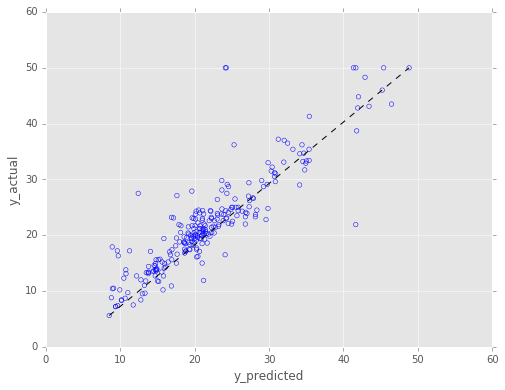

In [17]:
# now lets see how this estimator does on the held out test data. Note we could also use the OOB as the estimate
y_pred = bag_est.predict(X_test)

# Plot the predicted vs the actual medv response
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b')
# add a reference unity line
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

print("Test MSE = ", np.mean((y_pred-y_test)**2))

For a single tree we had a MSE of 23.36. Thanks to bagging, we now have a MSE of 16.13 for 500 bagged trees. 
The parameter previously defined 'n_estimators' allows for changing the number of trees used.

## Random Forests

In [6]:
# To build a random forest simply set the max features to be the sqrt of the number of features
forest = RandomForestRegressor(n_estimators=500, criterion='mse', max_features=6, bootstrap=True, 
                               oob_score=True, random_state=0 )

forest_est = forest.fit(X_train, y_train)

In [8]:
# compute the forests predictions and test MSE
y_pred = forest_est.predict(X_test)

mse = np.mean((y_pred-y_test)**2)
print('Test MSE =', mse)

Test MSE = 15.398662741501996


The random forests method reduces the test MSE slightly compared with the bagging approach.

In [9]:
# Examine the feature importances
feature_importances = pd.Series(data=forest_est.feature_importances_, index=list(df.columns[0:-1]))
feature_importances = feature_importances.sort_values(axis=0, ascending=False)
feature_importances

lstat      0.358933
rm         0.315203
ptratio    0.067290
dis        0.049604
crim       0.046855
nox        0.045266
indus      0.042835
age        0.030156
tax        0.019071
black      0.013970
rad        0.005218
zn         0.003190
chas       0.002409
dtype: float64

In sklearn the feature importances are the normalized reduction in the MSE brought by that feature. Let's make a bar plot of the feature importances.

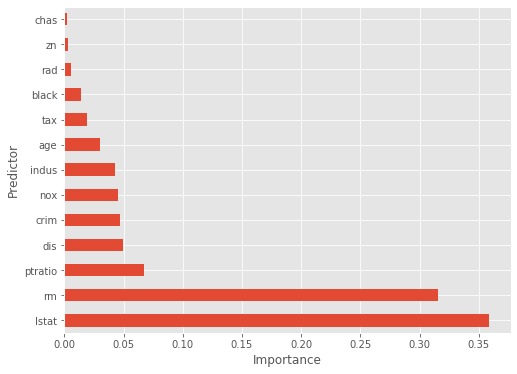

In [10]:
fig,ax1 = plt.subplots(1,1, figsize=(8,6))
feature_importances.plot(kind='barh', ax=ax1);
ax1.set_xlabel('Importance');
ax1.set_ylabel('Predictor');

Interestingly the most important factors for predicting the median home value is the lstat wealth factor and the number of rooms.